# Car sales criteria

The purpuse of the project is to determine which factors influence the price of a vehicle. 
My hypothesis is that vehicle's model, condition, age, mileage, transmission type, number of cylinders, and whether the vehicle has 4-wheel drive, all have impact on the car's price.

Data source: /datasets/vehicles_us.csv

We will do the following:
1. Sample the data and get a primary information about the data.
2. Examine the data
   1. Missing values, if any.
   2. Examine wrong data types and treat them.
3. Treat missing values. 
4. Treat suspicious data, like outliers, which may affect the analysis result.
5. Explore the data and drive conclusions.

## Initialization

In [1]:
# Loading all the libraries
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Loading the data

In [2]:
data=pd.read_csv('/datasets/vehicles_us.csv')

### Explore initial data

The dataset contains the following fields:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gas, diesel, etc.
- `odometer` — the vehicle's mileage when the ad was published
- `transmission`
- `paint_color`
- `is_4wd` — whether the vehicle has 4-wheel drive (Boolean type)
- `date_posted` — the date the ad was published
- `days_listed` — from publication to removal

In [3]:
#general/summary information about the DataFrame
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB
None


In [4]:
data.shape

(51525, 13)

In [5]:
data.describe(include='all')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
count,51525.000000,47906.000000,51525,51525,46265.000000,51525,43633.000000,51525,51525,42258,25572.0,51525,51525.00000
unique,NaN,NaN,100,6,NaN,5,NaN,3,13,12,NaN,354,NaN
top,NaN,NaN,ford f-150,excellent,NaN,gas,NaN,automatic,SUV,white,NaN,2019-03-17,NaN
freq,NaN,NaN,2796,24773,NaN,47288,NaN,46902,12405,10029,NaN,186,NaN
mean,12132.464920,2009.750470,NaN,NaN,6.125235,NaN,115553.461738,NaN,NaN,NaN,1.0,NaN,39.55476
std,10040.803015,6.282065,NaN,NaN,1.660360,NaN,65094.611341,NaN,NaN,NaN,0.0,NaN,28.20427
min,1.000000,1908.000000,NaN,NaN,3.000000,NaN,0.000000,NaN,NaN,NaN,1.0,NaN,0.00000
25%,5000.000000,2006.000000,NaN,NaN,4.000000,NaN,70000.000000,NaN,NaN,NaN,1.0,NaN,19.00000
50%,9000.000000,2011.000000,NaN,NaN,6.000000,NaN,113000.000000,NaN,NaN,NaN,1.0,NaN,33.00000
75%,16839.000000,2014.000000,NaN,NaN,8.000000,NaN,155000.000000,NaN,NaN,NaN,1.0,NaN,53.00000


In [6]:
#Let's see the number of missing values in all columns
data.isna().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In [7]:
#calculating the percentage of missing values
data.isnull().sum()/len(data)

price           0.000000
model_year      0.070238
model           0.000000
condition       0.000000
cylinders       0.102086
fuel            0.000000
odometer        0.153168
transmission    0.000000
type            0.000000
paint_color     0.179854
is_4wd          0.503697
date_posted     0.000000
days_listed     0.000000
dtype: float64

In [8]:
# data sample
data.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


In [9]:
data.tail(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
51515,12000,2005.0,chevrolet silverado 2500hd,good,8.0,diesel,228000.0,automatic,pickup,silver,1.0,2018-08-18,52
51516,8999,2011.0,jeep grand cherokee,good,6.0,gas,NaN,automatic,SUV,white,1.0,2018-11-01,51
51517,11000,2012.0,dodge charger,excellent,8.0,gas,81000.0,automatic,sedan,black,NaN,2019-04-19,44
51518,3750,2005.0,ford taurus,excellent,6.0,gas,110200.0,automatic,sedan,silver,NaN,2018-08-10,63
51519,11750,2015.0,honda accord,excellent,4.0,gas,NaN,automatic,coupe,NaN,NaN,2018-11-24,89
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71
51524,6300,2014.0,nissan altima,good,4.0,gas,NaN,automatic,sedan,NaN,NaN,2018-06-05,10


**Pre-liminary conclusions regarding the data**

There are some problems with the data in the dataset.

1. There are missing values in a number of columns. The missing values are found in the following columns:
- model_year - about 7% of the data
- cylinders - about 10% of the data
- odometer - a little over 15% of the data. This is rather large portion all the data and we will try to restore it for further analysis.
- paint_color - a little over 17% of the data. This column has the most missing values. It will need further investigation to decide whether this column is needed for analysis and missing values can be restored.
- is_4wd - 50% of the data is missing

2. Column with inappropriate data types:
- date_posted: string - the data type should be datetime

3. Issues with data:
- price column has a minimum value of $1 which can't be a legitimate price for a car. This should be investigated further.


### Conclusions and further steps

The missing values should be replaced or dropped in model_year, cylinders, is_4wd, and odometer columns. is-4wd column is boolean type and, therefore, the NaN values are False values. 

**Next steps:**
1. Investigate missing values in model_year, cylinders, and odometer columns and restore the data wherever possible. The model year, number of cylinders and mileage has a direct impact on the price, therefor, the missing values should be treated properly and restored by finding estimates, in order not to lose data.
2. Convert data to correct types, such as date_posted column must be converted to timedate type in order to be able to analyse the data in the column.

## Treating missing values

In [10]:
#Let's first look at the model_year column
data.model_year.describe()

count    47906.000000
mean      2009.750470
std          6.282065
min       1908.000000
25%       2006.000000
50%       2011.000000
75%       2014.000000
max       2019.000000
Name: model_year, dtype: float64

In [11]:
#Let's look at the rows where the model_year has minimal value:
data[data['model_year'] == 1908]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
33906,12995,1908.0,gmc yukon,good,8.0,gas,169328.0,automatic,SUV,black,NaN,2018-07-06,34
33907,12995,1908.0,cadillac escalade,excellent,8.0,gas,NaN,automatic,SUV,white,NaN,2018-06-24,25


While looking at the data, we see that something is not right. Assuming that these could be vintage collectible cars made in 1908, the transmission could not be automatic. It's best to keep an eye on these rows and maybe exclude them later from the analysis.

In [12]:
data[data['model_year'] < 1960]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
10018,23900,1955.0,ford f250,excellent,6.0,gas,47180.0,manual,truck,blue,NaN,2018-12-22,61
14752,15000,1954.0,ford f-150,excellent,NaN,gas,3565.0,manual,pickup,black,NaN,2019-02-16,13
22595,21000,1948.0,chevrolet impala,like new,8.0,gas,4000.0,automatic,sedan,red,NaN,2019-01-18,24
33906,12995,1908.0,gmc yukon,good,8.0,gas,169328.0,automatic,SUV,black,NaN,2018-07-06,34
33907,12995,1908.0,cadillac escalade,excellent,8.0,gas,NaN,automatic,SUV,white,NaN,2018-06-24,25
34713,5000,1936.0,ford f-150,excellent,6.0,gas,30000.0,manual,pickup,purple,NaN,2018-11-22,10
36582,44900,1949.0,chevrolet suburban,good,NaN,gas,1800.0,automatic,wagon,orange,NaN,2018-08-19,10
39580,35000,1958.0,chevrolet impala,excellent,8.0,gas,3184.0,automatic,coupe,black,NaN,2018-05-19,33
45694,18000,1929.0,ford f-150,good,8.0,gas,NaN,manual,other,silver,NaN,2018-11-18,59
48414,37900,1958.0,chevrolet impala,good,8.0,gas,62799.0,automatic,coupe,NaN,NaN,2018-08-11,10


In [13]:
data[data['model_year'].isna()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
20,6990,NaN,chevrolet tahoe,excellent,8.0,gas,147485.0,automatic,SUV,silver,1.0,2018-08-05,28
65,12800,NaN,ford f-150,excellent,6.0,gas,108500.0,automatic,pickup,white,NaN,2018-09-23,15
69,7800,NaN,ford f-150,like new,8.0,gas,97510.0,automatic,truck,white,1.0,2019-02-20,39
72,3650,NaN,subaru impreza,excellent,NaN,gas,74000.0,automatic,sedan,blue,1.0,2018-08-07,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51464,8890,NaN,ford f250 super duty,good,8.0,gas,135778.0,automatic,truck,red,1.0,2018-11-28,24
51465,34595,NaN,gmc yukon,excellent,8.0,gas,86456.0,automatic,SUV,silver,1.0,2019-04-18,13
51487,1495,NaN,ford f-150,fair,6.0,gas,15804.0,manual,truck,white,1.0,2018-09-18,56
51488,21900,NaN,chevrolet silverado 3500hd,excellent,8.0,diesel,203000.0,automatic,truck,white,1.0,2018-12-27,37


In [14]:
#Creating dictionary with model's year for each model
model_year_dict = data.groupby('model')['model_year'].apply(lambda x: x.value_counts().idxmax()).to_dict()

#Replacing the values in model_year column with the values from the dictionary
data['model_year']=data['model_year'].fillna(data.model.map(model_year_dict))

In [15]:
data['model_year'].describe()

count    51525.000000
mean      2009.871732
std          6.145439
min       1908.000000
25%       2007.000000
50%       2011.000000
75%       2014.000000
max       2019.000000
Name: model_year, dtype: float64

In [16]:
data.model_year.unique()

array([2011., 2013., 2003., 2017., 2014., 2015., 2012., 2008., 2018.,
       2009., 2010., 2007., 2004., 2005., 2001., 2006., 1966., 1994.,
       2019., 2000., 2016., 1993., 1999., 1997., 2002., 1981., 1995.,
       1996., 1975., 1998., 1985., 1977., 1987., 1974., 1990., 1992.,
       1991., 1972., 1967., 1988., 1969., 1989., 1978., 1965., 1979.,
       1968., 1986., 1980., 1964., 1963., 1984., 1982., 1973., 1970.,
       1955., 1971., 1976., 1983., 1954., 1962., 1948., 1960., 1908.,
       1961., 1936., 1949., 1958., 1929.])

In [17]:
#replacing missing values in odometer column
data['odometer'] = data.groupby(['model', 'model_year'])['odometer'].transform(lambda grp: grp.fillna(grp.mode().mean()))
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,2013.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,181888.5,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


In [18]:
#Creating dictionary with number of cylinders for each model
cylinders_dict = data.groupby('model')['cylinders'].apply(lambda x: x.value_counts().idxmax()).to_dict()

#Replacing the values in cylinders column with the values from the dictionary
data['cylinders']=data['cylinders'].fillna(data.model.map(cylinders_dict))
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,2013.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,181888.5,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


In [19]:
data.cylinders.unique()

array([ 6.,  4.,  8.,  5., 10.,  3., 12.])

In [20]:
data['is_4wd'] = data['is_4wd'].fillna(0)

In [21]:
data.isna().sum()

price              0
model_year         0
model              0
condition          0
cylinders          0
fuel               0
odometer          83
transmission       0
type               0
paint_color     9267
is_4wd             0
date_posted        0
days_listed        0
dtype: int64

## Fixing data types

In [22]:
data.dtypes

price             int64
model_year      float64
model            object
condition        object
cylinders       float64
fuel             object
odometer        float64
transmission     object
type             object
paint_color      object
is_4wd          float64
date_posted      object
days_listed       int64
dtype: object

In [23]:
data['date_posted'] = pd.to_datetime(data['date_posted'], format='%Y-%m-%d')

## Enriching the data

Let's add columns with day of the week, month, and year, when the ad was posted to make the further analysis easier.    
Let's also add a column with vehicle's age and average mileage per year.

In [24]:
# Adding datetime values for when the ad was placed - weekday of the post
data['weekday_posted']=pd.to_datetime(data['date_posted']).dt.weekday
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19,5
1,25500,2013.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,4
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,3
3,1500,2003.0,ford f-150,fair,8.0,gas,181888.5,automatic,pickup,NaN,0.0,2019-03-22,9,4
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,1


In [25]:
#month of the post
data['month_posted']=pd.to_datetime(data['date_posted']).dt.month
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,month_posted
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19,5,6
1,25500,2013.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,4,10
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,3,2
3,1500,2003.0,ford f-150,fair,8.0,gas,181888.5,automatic,pickup,NaN,0.0,2019-03-22,9,4,3
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,1,4


In [26]:
#year of the post
data['year_posted']=pd.to_datetime(data['date_posted']).dt.year
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,month_posted,year_posted
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19,5,6,2018
1,25500,2013.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,4,10,2018
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,3,2,2019
3,1500,2003.0,ford f-150,fair,8.0,gas,181888.5,automatic,pickup,NaN,0.0,2019-03-22,9,4,3,2019
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,1,4,2019


In [27]:
#Let's add the vehicle's age when the ad was placed
data['vehicle_age'] = data['year_posted'] - data['model_year']
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,month_posted,year_posted,vehicle_age
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19,5,6,2018,7.0
1,25500,2013.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,4,10,2018,5.0
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,3,2,2019,6.0
3,1500,2003.0,ford f-150,fair,8.0,gas,181888.5,automatic,pickup,NaN,0.0,2019-03-22,9,4,3,2019,16.0
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,1,4,2019,2.0


In [28]:
data['vehicle_age'].unique()

array([  7.,   5.,   6.,  16.,   2.,   4.,   3.,  11.,   1.,  10.,   8.,
         0.,  15.,  14.,   9.,  13.,  17.,  12.,  53.,  24.,  18.,  19.,
        26.,  22.,  38.,  20.,  23.,  44.,  21.,  25.,  33.,  42.,  31.,
        43.,  29.,  28.,  46.,  52.,  49.,  30.,  40.,  54.,  39.,  50.,
        27.,  32.,  55.,  37.,  56.,  34.,  45.,  41.,  51.,  63.,  47.,
        48.,  36.,  35.,  65.,  57.,  71.,  58.,  59., 110.,  82.,  69.,
        60.,  89.])

In [29]:
def miles_per_year_calc(row):

    """
The function will calculate vehicles' average mileage per year by iterating over each row and using two
parameter: odometer and vehicle_age - by dividing total mileage by vehicle's age.
- odometer (total mileage) equals the value in 'odometer' column
- vehicle_age equals the value in the created column 'vehicle_age'
If vehicle_age is >0, the function will return the result of the division.
If vehicle_age = 0, the function will return the value of the odometer (total mileage).
    """
    
    odometer = row['odometer']
    vehicle_age = row['vehicle_age']
    
    if vehicle_age > 0:
        return odometer/vehicle_age
    else:
        return odometer

In [30]:
data['miles_per_year']=data.apply(miles_per_year_calc,axis=1)
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,month_posted,year_posted,vehicle_age,miles_per_year
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19,5,6,2018,7.0,20714.285714
1,25500,2013.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,4,10,2018,5.0,17741.000000
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,3,2,2019,6.0,18333.333333
3,1500,2003.0,ford f-150,fair,8.0,gas,181888.5,automatic,pickup,NaN,0.0,2019-03-22,9,4,3,2019,16.0,11368.031250
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,1,4,2019,2.0,40451.500000


In [31]:
data['miles_per_year'].describe()

count     51442.000000
mean      18404.703870
std       14058.527021
min           0.000000
25%       10650.000000
50%       15192.083333
75%       22066.666667
max      373200.000000
Name: miles_per_year, dtype: float64

In [32]:
#Let's replace the condition values with something that can be manipulated more easily
data.condition.unique()

array(['good', 'like new', 'fair', 'excellent', 'salvage', 'new'],
      dtype=object)

In [33]:
condition_dict={
    'new':5,
    'like new':4,
    'excellent':3,
    'good':2,
    'fair':1,
    'salvage':0 
}

def replace_condition(x):
    """
    The function will take the condition dictionary and return numeric equivalent for each condition category.
    We then will apply the function to 'condition' column and creat a new column 'condition_num_value' with
    numeric value for each condition value.
    """
    return condition_dict[x]

data['condition_num_value']=data['condition'].apply(replace_condition)
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,month_posted,year_posted,vehicle_age,miles_per_year,condition_num_value
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19,5,6,2018,7.0,20714.285714,2
1,25500,2013.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,4,10,2018,5.0,17741.000000,2
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,3,2,2019,6.0,18333.333333,4
3,1500,2003.0,ford f-150,fair,8.0,gas,181888.5,automatic,pickup,NaN,0.0,2019-03-22,9,4,3,2019,16.0,11368.031250,1
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,1,4,2019,2.0,40451.500000,3


## Checking the clean data

In [34]:
#general/summary information about the DataFrame
data.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed,weekday_posted,month_posted,year_posted,vehicle_age,miles_per_year,condition_num_value
count,51525.000000,51525.000000,51525.000000,51442.000000,51525.000000,51525.00000,51525.000000,51525.000000,51525.000000,51525.000000,51442.000000,51525.000000
mean,12132.464920,2009.871732,6.121494,115485.960136,0.496303,39.55476,3.005434,6.628491,2018.307462,8.435730,18404.703870,2.637535
std,10040.803015,6.145439,1.657296,63854.446175,0.499991,28.20427,1.997759,3.474134,0.461447,6.158874,14058.527021,0.712447
min,1.000000,1908.000000,3.000000,0.000000,0.000000,0.00000,0.000000,1.000000,2018.000000,0.000000,0.000000,0.000000
25%,5000.000000,2007.000000,4.000000,71039.250000,0.000000,19.00000,1.000000,3.000000,2018.000000,4.000000,10650.000000,2.000000
50%,9000.000000,2011.000000,6.000000,113162.000000,0.000000,33.00000,3.000000,7.000000,2018.000000,7.000000,15192.083333,3.000000
75%,16839.000000,2014.000000,8.000000,154963.500000,1.000000,53.00000,5.000000,10.000000,2019.000000,12.000000,22066.666667,3.000000
max,375000.000000,2019.000000,12.000000,990000.000000,1.000000,271.00000,6.000000,12.000000,2019.000000,110.000000,373200.000000,5.000000


In [35]:
data.dtypes

price                           int64
model_year                    float64
model                          object
condition                      object
cylinders                     float64
fuel                           object
odometer                      float64
transmission                   object
type                           object
paint_color                    object
is_4wd                        float64
date_posted            datetime64[ns]
days_listed                     int64
weekday_posted                  int64
month_posted                    int64
year_posted                     int64
vehicle_age                   float64
miles_per_year                float64
condition_num_value             int64
dtype: object

In [36]:
data.isna().sum()

price                     0
model_year                0
model                     0
condition                 0
cylinders                 0
fuel                      0
odometer                 83
transmission              0
type                      0
paint_color            9267
is_4wd                    0
date_posted               0
days_listed               0
weekday_posted            0
month_posted              0
year_posted               0
vehicle_age               0
miles_per_year           83
condition_num_value       0
dtype: int64

It seems we have replaced all the values that could have been replaced in odometer column. The remaining missing values create missing values in the miles_per_year column we've created. So let's just drop these 83 rows.

In [37]:
data['paint_color'] = data['paint_color'].fillna(value='unknown')

In [38]:
data = data.dropna(subset=['odometer', 'miles_per_year'])

In [39]:
data.isna().sum()

price                  0
model_year             0
model                  0
condition              0
cylinders              0
fuel                   0
odometer               0
transmission           0
type                   0
paint_color            0
is_4wd                 0
date_posted            0
days_listed            0
weekday_posted         0
month_posted           0
year_posted            0
vehicle_age            0
miles_per_year         0
condition_num_value    0
dtype: int64

In [40]:
#sample of data
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,month_posted,year_posted,vehicle_age,miles_per_year,condition_num_value
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19,5,6,2018,7.0,20714.285714,2
1,25500,2013.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,4,10,2018,5.0,17741.000000,2
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,3,2,2019,6.0,18333.333333,4
3,1500,2003.0,ford f-150,fair,8.0,gas,181888.5,automatic,pickup,unknown,0.0,2019-03-22,9,4,3,2019,16.0,11368.031250,1
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,1,4,2019,2.0,40451.500000,3


In [41]:
data.duplicated().sum()

0

## Studying core parameters

The parameters are:
- Price
- The vehicle's age when the ad was placed
- Mileage (total and average per year)
- Number of cylinders
- Condition

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'vehicle_age'}>],
       [<AxesSubplot:title={'center':'miles_per_year'}>,
        <AxesSubplot:title={'center':'odometer'}>],
       [<AxesSubplot:title={'center':'cylinders'}>,
        <AxesSubplot:title={'center':'condition_num_value'}>]],
      dtype=object)

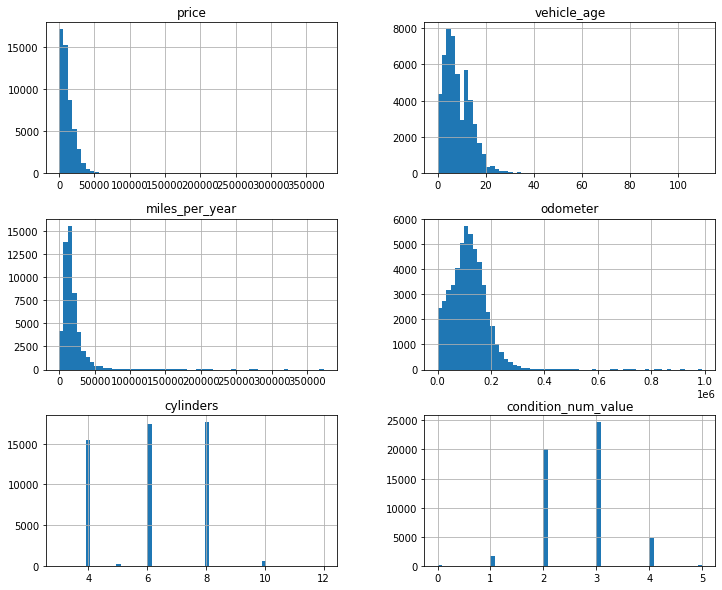

In [42]:
data.hist(column=['price', 'vehicle_age', 'miles_per_year', 'odometer', 'cylinders', 'condition_num_value'], figsize=(12,10),bins=60)

In [43]:
def distribution_percentile(parameter):
    """
    The function will:
    1. Print the general information on core parameters' data (statistics) and examine what are
    the outliers. 
    2. Plot a chart for the parameter.
    3. Determine whether theres's a skewness and to which side.
    
    The max border is set to 97th percentile.
    The min border is set to 3rd percentile. 
    The min and max percentiles may be changed later to filter out the outliers.
    """
    print('The histogram of: {}'.format(parameter))
    data[parameter].hist()
    plt.show()
    if data[parameter].mean()>data[parameter].median():
        print('The distribution is skewed to the right')
    else:
        print('The distribution is skewed to the left')
    print('---------------------------------------')
    print('Statistics on: {}'.format(parameter))
    print(data[parameter].describe())
  
    ninety_seven = np.percentile(data[parameter], 97)
    three = np.percentile(data[parameter], 3)
    print('---------------------------------------')
    print('min border:',three)
    print('max border:',ninety_seven)
    print('---------------------------------------')
    print('The outliers are considered to be values below',three, "and above",ninety_seven)
    print('We have',len(data[(data[parameter]<three)|(data[parameter]>ninety_seven)]),"values that we can consider outliers.")

The histogram of: price


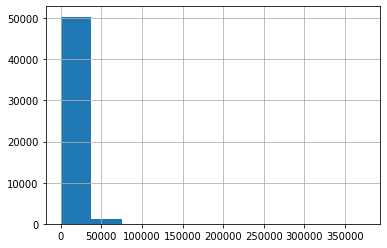

The distribution is skewed to the right
---------------------------------------
Statistics on: price
count     51442.00000
mean      12116.03919
std       10021.53735
min           1.00000
25%        5000.00000
50%        9000.00000
75%       16800.00000
max      375000.00000
Name: price, dtype: float64
---------------------------------------
min border: 1000.0
max border: 34950.0
---------------------------------------
The outliers are considered to be values below 1000.0 and above 34950.0
We have 2940 values that we can consider outliers.


In [44]:
#Let's look at the price distribution first
distribution_percentile('price')

Let's look at the minimal value in order to decide whether it's possible that the price with the car can be $1.

In [45]:
data[data['price'] == 1]['price'].count()

798

In [46]:
data[data['price'] <= 1000]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,month_posted,year_posted,vehicle_age,miles_per_year,condition_num_value
218,500,2004.0,toyota corolla,like new,4.0,gas,226980.0,automatic,sedan,blue,0.0,2018-09-17,24,0,9,2018,14.0,16212.857143,4
317,600,1999.0,toyota camry le,salvage,4.0,gas,216348.0,automatic,sedan,white,0.0,2019-03-04,23,0,3,2019,20.0,10817.400000,0
332,500,2004.0,toyota corolla,like new,4.0,gas,226980.0,automatic,sedan,unknown,0.0,2018-09-19,19,2,9,2018,14.0,16212.857143,4
405,1,2014.0,chevrolet camaro,excellent,6.0,gas,71310.0,automatic,coupe,unknown,0.0,2018-07-14,29,5,7,2018,4.0,17827.500000,3
406,288,2018.0,nissan altima,excellent,4.0,gas,40277.0,automatic,sedan,silver,0.0,2018-10-19,37,4,10,2018,0.0,40277.000000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51253,1000,2002.0,jeep grand cherokee laredo,fair,6.0,gas,175000.0,automatic,SUV,silver,1.0,2018-08-27,10,0,8,2018,16.0,10937.500000,1
51256,1,2012.0,honda civic lx,excellent,4.0,gas,71262.0,automatic,sedan,blue,0.0,2018-05-06,53,6,5,2018,6.0,11877.000000,3
51271,1000,2002.0,hyundai elantra,fair,4.0,gas,250000.0,manual,hatchback,red,0.0,2018-10-08,17,0,10,2018,16.0,15625.000000,1
51364,299,2004.0,toyota camry,excellent,4.0,gas,185234.0,automatic,sedan,silver,0.0,2018-12-09,5,6,12,2018,14.0,13231.000000,3


In [47]:
data[data['price'] <= 1000]['price'].unique()

array([ 500,  600,    1,  288,  700, 1000,  299,  999,  111,  850,  950,
        900,  233,  267,  155,  176,  400,  276,  196,  245,  750,  475,
        287,  295,  495,  800,  211,  243,  289,  244,  580,   69,  995,
        795,  257,  247,  206,  279,  895,   36,   12,   15,   85,   28,
         24,  650,  439,  320,  372,  200,  199,  359,  725,  250,  975,
         39,  875,   80,  340,   35,   32,  326,  253,  695,  483,  371,
        384,  298,  351,  399,  105,  169,  450,  350,   65,  575,  277,
        222,  198,  204,  188,  197,  422,  255,   25,    6,   11,  185,
        215,  534,  190,  195,  179,  180,  292,  228,  237,  899,    9,
        246,  855,  300,   20,  388,  171,  599,  460,  147,  699,  187,
          3,  550,  313,  590,    5,  472,   10])

Let's look at one of the vehicles with an odd price - Nissan Altima, 2018, sedan, 
4 cylinders, in excellent condition (index 406).

The price is $288. This looks strange.

In [48]:
data[data.index == 406]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,month_posted,year_posted,vehicle_age,miles_per_year,condition_num_value
406,288,2018.0,nissan altima,excellent,4.0,gas,40277.0,automatic,sedan,silver,0.0,2018-10-19,37,4,10,2018,0.0,40277.0,3


Let's check median price for a similar vehicle.

In [49]:
data[(data['model'] == 'nissan altima') & (data['condition'] == 'excellent') & (data['model_year'] == 2018) 
     & (data['cylinders'] == 4) & (data['type'] == 'sedan')]['price'].median()

14750.0

The median price for Nissan Altima, 2018, sedan, 4 cylinders, in excellent condition is **$14,750**, which is more
realistic. 
In general, many listed prices below 1000 look strange - the numbers are odd and look as if ther might have been a mistake during the initial listing process - maybe a person listing their vehicle has missed some 0's. If we look at the data with the price values below 1000, we see that the majority of these vehicles are in a good condition and relatively new, therefore, these prices are suspiciously low. It maybe reasonable to get rid off of the rows with prices lower than 1000. 
This is also true regaridng the upper limit of the price range.

The histogram of: vehicle_age


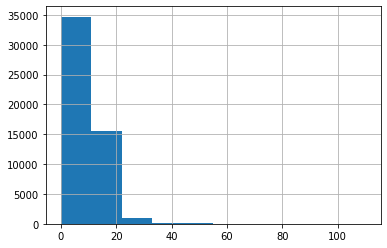

The distribution is skewed to the right
---------------------------------------
Statistics on: vehicle_age
count    51442.000000
mean         8.421232
std          6.105291
min          0.000000
25%          4.000000
50%          7.000000
75%         12.000000
max        110.000000
Name: vehicle_age, dtype: float64
---------------------------------------
min border: 0.0
max border: 21.0
---------------------------------------
The outliers are considered to be values below 0.0 and above 21.0
We have 1264 values that we can consider outliers.


In [50]:
#Let's examin the age of the vehicles distribution
distribution_percentile('vehicle_age')

In [51]:
data[data['vehicle_age'] > 21]['price'].describe()

count     1264.000000
mean      7304.759494
std       8608.344244
min          1.000000
25%       2500.000000
50%       4600.000000
75%       8500.000000
max      69900.000000
Name: price, dtype: float64

It looks that the price distribition for vehicles older than 21 year is vast, therefore, it's best to get rid of these rows.

The histogram of: miles_per_year


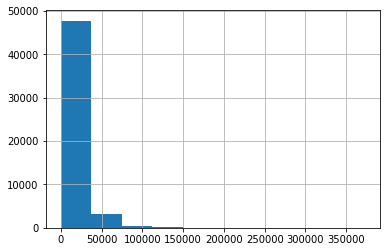

The distribution is skewed to the right
---------------------------------------
Statistics on: miles_per_year
count     51442.000000
mean      18404.703870
std       14058.527021
min           0.000000
25%       10650.000000
50%       15192.083333
75%       22066.666667
max      373200.000000
Name: miles_per_year, dtype: float64
---------------------------------------
min border: 2390.0
max border: 50238.64499999987
---------------------------------------
The outliers are considered to be values below 2390.0 and above 50238.64499999987
We have 3087 values that we can consider outliers.


In [52]:
#Let's look at the vehicles' avetage mileage per year:
distribution_percentile('miles_per_year')

Because of the outliers, it's hard to see the actual distribution of the vehicles' mileage
and it's impossible to read the histogram.

The histogram of: cylinders


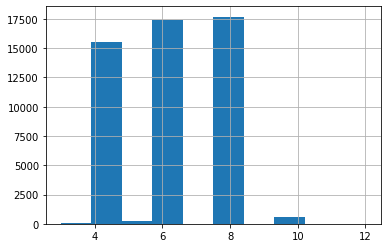

The distribution is skewed to the right
---------------------------------------
Statistics on: cylinders
count    51442.000000
mean         6.121146
std          1.657868
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64
---------------------------------------
min border: 4.0
max border: 8.0
---------------------------------------
The outliers are considered to be values below 4.0 and above 8.0
We have 585 values that we can consider outliers.


In [53]:
#Cycilnders' distribution:
distribution_percentile('cylinders')

It looks like the majority of the cars have 4-8 cylinders. Additionally, 5 cylinders seem to be a rare case. It's best to exclude those from the dataset as well.

In [54]:
data[data['cylinders'] == 12]['price'].median()

19000.0

The median price for a 12 cylinder car is $19.000, which is almost 2.5 times more than the median price.

It maybe be reasonable to get rid of the outliers here.

The histogram of: condition_num_value


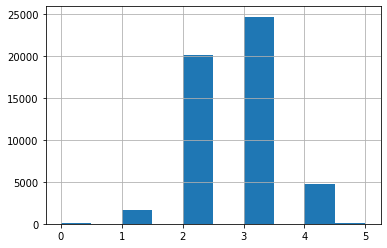

The distribution is skewed to the left
---------------------------------------
Statistics on: condition_num_value
count    51442.000000
mean         2.637592
std          0.712422
min          0.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: condition_num_value, dtype: float64
---------------------------------------
min border: 1.0
max border: 4.0
---------------------------------------
The outliers are considered to be values below 1.0 and above 4.0
We have 257 values that we can consider outliers.


In [55]:
distribution_percentile('condition_num_value')

## Studying and treating outliers


In [56]:
#Price outliers
price_upper = np.percentile(data.price, 97)
price_lower = np.percentile(data.price, 3)
print('Price upper limit is', price_upper)
print('Price lower limit is', price_lower)

Price upper limit is 34950.0
Price lower limit is 1000.0


In [57]:
#Vehicle age outliers
age_upper = np.percentile(data.vehicle_age, 97)
age_lower = np.percentile(data.vehicle_age, 5)
print('Vehicles\' age upper limit is', age_upper)
print('Vehicles\' age lower limit is', age_lower)

Vehicles' age upper limit is 21.0
Vehicles' age lower limit is 1.0


In [58]:
#Average mileage per year outliers
avg_mile_upper = np.percentile(data.miles_per_year, 97)
avg_mile_lower = np.percentile(data.miles_per_year, 3)
print('Average miles per year upper limit is', avg_mile_upper)
print('Average miles per year lower limit is', avg_mile_lower)

Average miles per year upper limit is 50238.64499999987
Average miles per year lower limit is 2390.0


In [59]:
#Cylinders outliers
cyl_upper = np.percentile(data.cylinders, 97)
cyl_lower = np.percentile(data.cylinders, 3)
print('Cylinders upper limit is', cyl_upper)
print('Cylinders lower limit is', cyl_lower)

Cylinders upper limit is 8.0
Cylinders lower limit is 4.0


In [60]:
#Condition outliers
cond_upper = np.percentile(data.condition_num_value, 97)
cond_lower = np.percentile(data.condition_num_value, 3)
print('Condition upper limit is', cond_upper)
print('Condition lower limit is', cond_lower)

Condition upper limit is 4.0
Condition lower limit is 1.0


**Let's store data without outliers in a separate DataFrame**

In [61]:
#Price outliers
#lower
price_outliers_lower = data.query('price < 1000')
#upper
price_outliers_upper = data.query('price > 34950')

In [62]:
#Vehicle age outliers
#lower
age_outliers_lower = data.query('vehicle_age < 1')
#upper
age_outliers_upper = data.query('vehicle_age > 21')

In [63]:
#Average mileage per year -  outliers
#lower
avg_miles_outliers_lower = data.query('miles_per_year < 2390')
#upper
_avg_miles_outliers_upper = data.query('miles_per_year > 50238.7')

In [64]:
#Cylinders -  outliers
#lower
cyl_outliers_lower = data.query('cylinders < 4 and cylinders == 5')
#upper
cyl_outliers_upper = data.query('cylinders > 8')

In [65]:
#Vehicle condition - outliers
#lower
cond_outliers_lower = data.query('condition_num_value < 1')
#upper
cond_outliers_upper = data.query('condition_num_value > 4')

In [66]:
data_without_outliers = data.query('1000 <= price <= 34950 and 1 <= condition_num_value <= 4 and 2390 <= miles_per_year <= 50238.6 and 1 <= vehicle_age <=21 and 4 <= cylinders <= 8 and cylinders!=5')
data_without_outliers

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,month_posted,year_posted,vehicle_age,miles_per_year,condition_num_value
0,9400,2011.0,bmw x5,good,6.0,gas,145000.00,automatic,SUV,unknown,1.0,2018-06-23,19,5,6,2018,7.0,20714.285714,2
1,25500,2013.0,ford f-150,good,6.0,gas,88705.00,automatic,pickup,white,1.0,2018-10-19,50,4,10,2018,5.0,17741.000000,2
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.00,automatic,sedan,red,0.0,2019-02-07,79,3,2,2019,6.0,18333.333333,4
3,1500,2003.0,ford f-150,fair,8.0,gas,181888.50,automatic,pickup,unknown,0.0,2019-03-22,9,4,3,2019,16.0,11368.031250,1
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.00,automatic,sedan,black,0.0,2019-04-02,28,1,4,2019,2.0,40451.500000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51519,11750,2015.0,honda accord,excellent,4.0,gas,44494.75,automatic,coupe,unknown,0.0,2018-11-24,89,5,11,2018,3.0,14831.583333,3
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.00,automatic,sedan,black,0.0,2018-10-03,37,2,10,2018,5.0,17627.200000,4
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.00,automatic,sedan,blue,0.0,2018-11-15,32,3,11,2018,9.0,14222.222222,3
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.00,automatic,sedan,black,0.0,2018-07-02,71,0,7,2018,5.0,27914.600000,2


**We lost about 8.000 rows of data, which is about 16% of the data**

## Core parameters without outliers


Let's examine the core parameters without the outliers and plot charts for them.

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'vehicle_age'}>],
       [<AxesSubplot:title={'center':'miles_per_year'}>,
        <AxesSubplot:title={'center':'cylinders'}>],
       [<AxesSubplot:title={'center':'condition_num_value'}>,
        <AxesSubplot:>]], dtype=object)

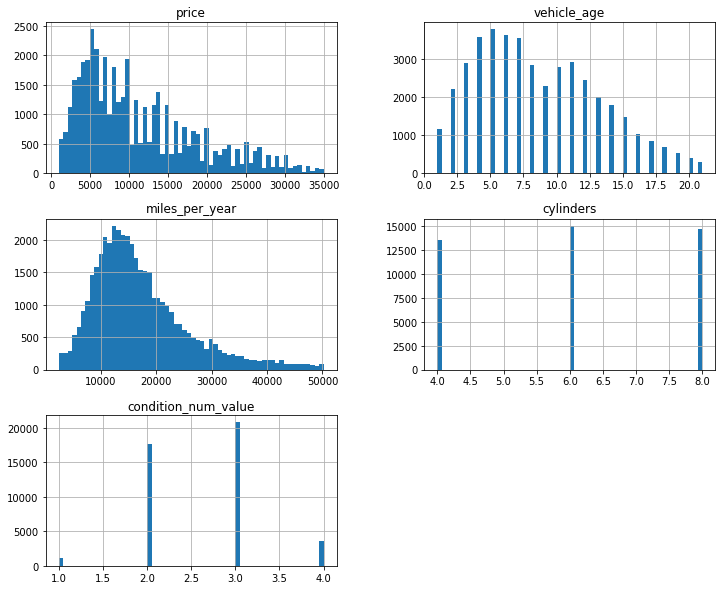

In [67]:
data_without_outliers.hist(column=['price', 'vehicle_age', 'miles_per_year', 'cylinders', 'condition_num_value'], figsize=(12,10),bins=60)

The distribution in all core parameteres is normal and the histograms are readable, 
therefore, it seems we were right to exclude the outliers.   

- The Price parameter has a few peaks: at 5,500, at 9,000, 14,000, and 20,000.   
- The vehicles' age parameter also has two peaks: at 5,5 and at 11 years.   
- Miles per year parameter has a peak at about 12,000 miles.   
- There's almost the same number of cylinders of each type, with a slight advatage for 6-cylinder cars.   
- Condition parameter - over 20.000 cars (about 50%) are in excellent condition.

## Ads lifetime


We will now study how many days advertisements were displayed (days_listed). We will plot a histogram, calculate the mean and median. Then we will analyse the typical lifetime of an ad.

In [68]:
data_without_outliers['days_listed'].describe()

count    43215.000000
mean        39.582321
std         28.247098
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

<AxesSubplot:>

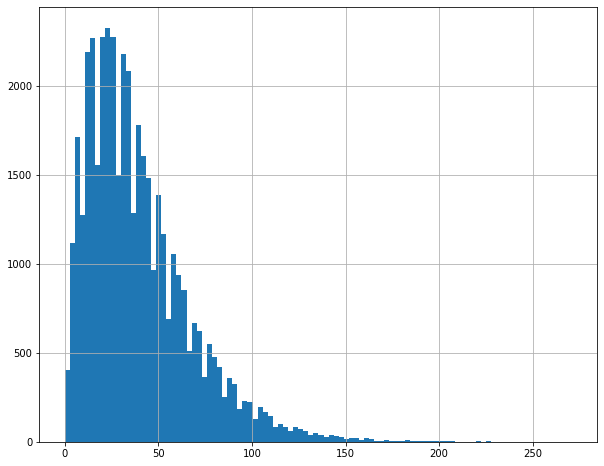

In [69]:
data_without_outliers['days_listed'].hist(bins=100, figsize=(10, 8))

In [70]:
data_without_outliers['days_listed'].agg(['mean', 'median'])

mean      39.582321
median    33.000000
Name: days_listed, dtype: float64

There's a peack at about 22 days, and from the data it is clear that the typical lifetime of an ad is between 19 and 53 days.   
Anything below 19 days seems to be too fast.   
Anything above 53 days is too long.

## Average price per each type of vehicle

We will analyze the number of ads and the average price for each type of vehicle. The we will plot a graph showing the dependence of the number of ads on the vehicle type. Based on the result, we will select the two types with the greatest number of ads.

In [71]:
#Let's first look at the vehicle model
sorted(data_without_outliers.model.unique())

['acura tl',
 'bmw x5',
 'buick enclave',
 'cadillac escalade',
 'chevrolet camaro',
 'chevrolet camaro lt coupe 2d',
 'chevrolet colorado',
 'chevrolet corvette',
 'chevrolet cruze',
 'chevrolet equinox',
 'chevrolet impala',
 'chevrolet malibu',
 'chevrolet silverado',
 'chevrolet silverado 1500',
 'chevrolet silverado 1500 crew',
 'chevrolet silverado 2500hd',
 'chevrolet silverado 3500hd',
 'chevrolet suburban',
 'chevrolet tahoe',
 'chevrolet trailblazer',
 'chevrolet traverse',
 'chrysler 200',
 'chrysler 300',
 'chrysler town & country',
 'dodge charger',
 'dodge dakota',
 'dodge grand caravan',
 'ford econoline',
 'ford edge',
 'ford escape',
 'ford expedition',
 'ford explorer',
 'ford f-150',
 'ford f-250',
 'ford f-250 sd',
 'ford f-250 super duty',
 'ford f-350 sd',
 'ford f150',
 'ford f150 supercrew cab xlt',
 'ford f250',
 'ford f250 super duty',
 'ford f350',
 'ford f350 super duty',
 'ford focus',
 'ford focus se',
 'ford fusion',
 'ford fusion se',
 'ford mustang',
 '

In [72]:
def vehicle_maker_cat(i):
    
    if i.startswith('ford'):
        return 'ford'
    elif i.startswith('acura'):
        return 'acura'
    elif i.startswith('bmw'):
        return 'bmw'
    elif i.startswith('buick'):
        return 'buick'
    elif i.startswith('cadillac'):
        return 'cadillac'
    elif i.startswith('chevrolet'):
        return 'chevrolet'
    elif i.startswith('chrysler'):
        return 'chrysler'
    elif i.startswith('dodge'):
        return 'dodge'
    elif i.startswith('gmc'):
        return 'gmc'
    elif i.startswith('honda'):
        return 'honda'
    elif i.startswith('jeep'):
        return 'jeep'
    elif i.startswith('kia'):
        return 'kia'
    elif i.startswith('nissan'):
        return 'nissan'
    elif i.startswith('ram'):
        return 'ram'
    elif i.startswith('subaru'):
        return 'subaru'
    elif i.startswith('toyota'):
        return 'toyota'
    elif i.startswith('hyundai'):
        return 'hyundai' 
    else:
        return 'volkswagen'

In [73]:
import warnings
warnings.filterwarnings(action='ignore')

In [74]:
data_without_outliers['vehicle_maker'] = data_without_outliers['model'].apply(vehicle_maker_cat)
data_without_outliers.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,month_posted,year_posted,vehicle_age,miles_per_year,condition_num_value,vehicle_maker
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19,5,6,2018,7.0,20714.285714,2,bmw
1,25500,2013.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,4,10,2018,5.0,17741.000000,2,ford
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,3,2,2019,6.0,18333.333333,4,hyundai
3,1500,2003.0,ford f-150,fair,8.0,gas,181888.5,automatic,pickup,unknown,0.0,2019-03-22,9,4,3,2019,16.0,11368.031250,1,ford
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,1,4,2019,2.0,40451.500000,3,chrysler


In [75]:
model_price = data_without_outliers.pivot_table(index='vehicle_maker', values='price', aggfunc=['mean', 'count'])
model_price.columns = ['mean price', 'ads count']
model_price.sort_values(by='mean price')

,mean price,ads count
vehicle_maker,,
acura,6523.515152,231
hyundai,6789.427699,982
honda,7276.401322,3177
volkswagen,7730.300613,652
dodge,7908.804656,988
nissan,8009.888003,2509
subaru,8168.809028,1152
chrysler,8276.205257,799
kia,8470.923077,507


<AxesSubplot:xlabel='vehicle_maker'>

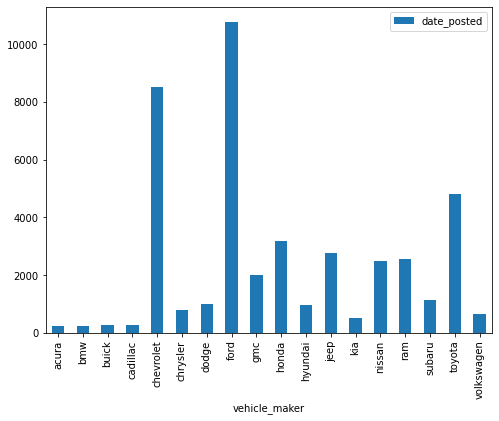

In [76]:
data_without_outliers.pivot_table(index='vehicle_maker', values='date_posted', aggfunc='count').plot(kind='bar', figsize=(8,6))

It looks like Ford cars have the most adds, but RAM cars are the most expensive. But maybe this is because those are different types of vehicles. Let's look at vehicles' types.

In [77]:
type_price = data_without_outliers.pivot_table(index='type', values='price', aggfunc=['mean', 'count'])
type_price.columns = ['mean price', 'ads count']
type_price.sort_values(by='ads count')

,mean price,ads count
type,,
bus,5412.500000,6
offroad,14680.469512,164
other,10423.142857,210
convertible,12797.264808,287
van,8340.440882,499
hatchback,6663.890244,902
mini-van,7600.086338,1054
wagon,9003.122695,1410
coupe,13613.386535,1723


<AxesSubplot:xlabel='type'>

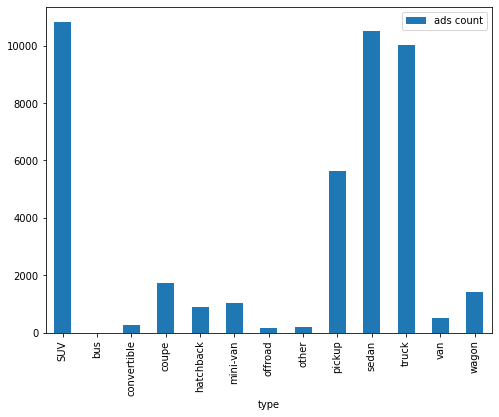

In [78]:
type_price.plot(y='ads count', kind='bar', figsize=(8,6))

**The two types with the biggest number of ads are SUV and sedan.**

Let's explore number of ads and mean price per vehicles' condition, transmission type, fuel, number of cycilnders, and color in all data.

In [79]:
#Mean price and ads count per vehicles' condition
cond_price = data_without_outliers.pivot_table(index='condition', values='price', aggfunc=['mean', 'count'])
cond_price.columns = ['mean price', 'ads count']
cond_price.sort_values(by='ads count')

,mean price,ads count
condition,,
fair,3699.816082,1169
like new,13625.167511,3552
good,10205.704893,17658
excellent,12031.085381,20836


About 50% of the vehicles listed are in excellent condition.

In [80]:
#Mean price and ads count per vehicles' transmission type
trans_price = data_without_outliers.pivot_table(index='transmission', values='price', aggfunc=['mean', 'count'])
trans_price.columns = ['mean price', 'ads count']
trans_price.sort_values(by='ads count')

,mean price,ads count
transmission,,
other,20001.550593,1097
manual,9341.369838,2155
automatic,11048.754073,39963


The majority of the vehicles listed are automatic.

In [81]:
#Mean price and ads count per vehicles' fuel type
fuel_price = data_without_outliers.pivot_table(index='fuel', values='price', aggfunc=['mean', 'count'])
fuel_price.columns = ['mean price', 'ads count']
fuel_price.sort_values(by='ads count')

,mean price,ads count
fuel,,
electric,8440.000000,5
other,16647.750000,92
hybrid,7382.965517,377
diesel,17844.226147,2746
gas,10757.752119,39995


The majority of the vehicles listed use gasoline.

In [82]:
#Mean price and ads count per vehicles' number of cylinders
cyl_price = data_without_outliers.pivot_table(index='cylinders', values='price', aggfunc=['mean', 'count'])
cyl_price.columns = ['mean price', 'ads count']
cyl_price.sort_values(by='ads count')

,mean price,ads count
cylinders,,
4.0,7619.349240,13495
8.0,14353.000340,14702
6.0,11304.619989,15018


No significant different in the number of ads.The 8-cylinder cars seem to be more expensive.

In [83]:
#Mean price and ads count per vehicles' color
color_price = data_without_outliers.pivot_table(index='paint_color', values='price', aggfunc=['mean', 'count'])
color_price.columns = ['mean price', 'ads count']
color_price.sort_values(by='ads count')

,mean price,ads count
paint_color,,
purple,7010.192771,83
yellow,13488.535484,155
orange,14424.810526,190
custom,10252.031828,974
brown,10071.300917,1090
green,8584.357265,1170
red,10763.344772,3701
blue,9531.358659,3817
grey,10359.411901,4302


White, black, silver, grey, and blue are top 5 colors. And purple, yellow, and orange are the list popular colors. The colour of about 18% of the listed vehicles is unknown.

## Price factors

We'll take each of the two popular types detected at the previous stage (SUV and sedan) and study whether the price depends on age, mileage, condition, transmission type, and color. For categorical variables (transmission type and color), we will plot box-and-whisker charts, and will create scatterplots for the rest.

In [84]:
#Let's slice the data per vehicle type for two popular types - SUV and sedan
SUV_data = data_without_outliers.query('type == "SUV"')
sedan_data = data_without_outliers.query('type == "sedan"')
pop_data = data_without_outliers.query('type == "SUV" and type == "sedan"')

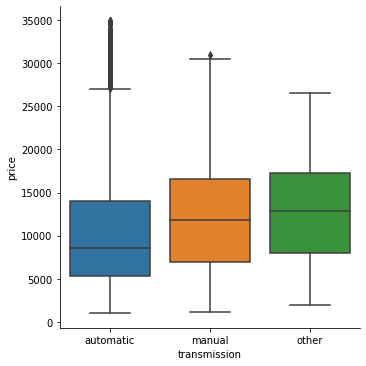

In [85]:
#plotting the graf for SUV and transmission type
sns.catplot(y='price', x='transmission', data=SUV_data, kind='box')

In SUV vehicles, the median price for manual transmission and other type of transmission is slightly higher than for the automatic one. However, the price range for the automatic transmission is very big with a significant number of outliers on the upper end.

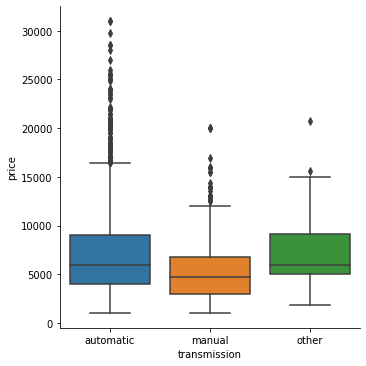

In [86]:
#plotting the graf for sedan and transmission type
sns.catplot(y='price', x='transmission', data=sedan_data, kind='box')

In sedan vehicles, the median price for automatic transmission and other type of transmission is slightly higher than for the manual one. The price range for the automatic transmission is bigger than for other types of transmission, with a significant number of outliers on the upper end.

In [87]:
SUV_data.paint_color.value_counts()

unknown    1922
black      1881
white      1690
silver     1417
grey       1053
blue        921
red         807
green       367
brown       341
custom      263
orange       74
yellow       39
purple       37
Name: paint_color, dtype: int64

Based on the data above, SUV type vehicle colours yellow and purple have less than 50 ads each, therefore, we should filter them out.

In [88]:
SUV_filtered_color = SUV_data.query('paint_color!= "purple" and paint_color!="yellow"')

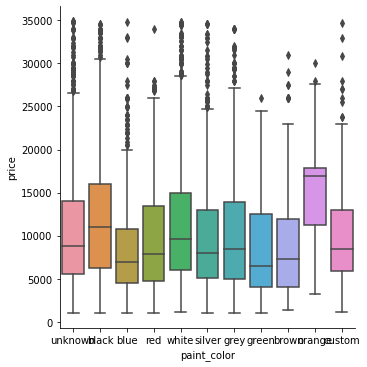

In [89]:
#plotting the graf for SUV and color
sns.catplot(y='price', x='paint_color', data=SUV_filtered_color, kind='box')

In [90]:
sedan_data.paint_color.value_counts()

unknown    1887
silver     1797
black      1532
grey       1409
white      1271
blue       1077
red         808
custom      242
brown       235
green       189
purple       24
yellow       19
orange        7
Name: paint_color, dtype: int64

Based on the data above, sedan type vehicle colours orange, yellow, and purple have less than 50 ads each, therefore, we should filter them out.

In [91]:
sedan_filtered_color = sedan_data.query('paint_color!= "purple" and paint_color!="yellow" and paint_color!= "orange"')

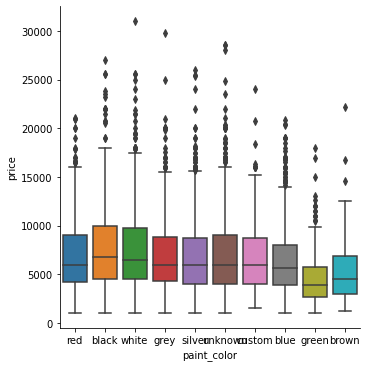

In [92]:
#plotting the graf for sedan and color
sns.catplot(y='price', x='paint_color', data=sedan_filtered_color, kind='box')

For both SUV and sedan vehicles it's difficult to determine whether a colour plays a factor in vehicle's price. There're many outliers for all colours on the upper side and the price range seems to be very large. In SUV, the rare colour such as orange seems to be most expensive, but the number of listings is too small, relatively to vehicles of other colours, to drive any conclusions.
    
In sedan type vehicles we can only conclude that the median price for green and brown vehicles is sligtly lower than for other colours.

array([[<AxesSubplot:xlabel='price', ylabel='price'>,
        <AxesSubplot:xlabel='miles_per_year', ylabel='price'>,
        <AxesSubplot:xlabel='vehicle_age', ylabel='price'>,
        <AxesSubplot:xlabel='condition_num_value', ylabel='price'>],
       [<AxesSubplot:xlabel='price', ylabel='miles_per_year'>,
        <AxesSubplot:xlabel='miles_per_year', ylabel='miles_per_year'>,
        <AxesSubplot:xlabel='vehicle_age', ylabel='miles_per_year'>,
        <AxesSubplot:xlabel='condition_num_value', ylabel='miles_per_year'>],
       [<AxesSubplot:xlabel='price', ylabel='vehicle_age'>,
        <AxesSubplot:xlabel='miles_per_year', ylabel='vehicle_age'>,
        <AxesSubplot:xlabel='vehicle_age', ylabel='vehicle_age'>,
        <AxesSubplot:xlabel='condition_num_value', ylabel='vehicle_age'>],
       [<AxesSubplot:xlabel='price', ylabel='condition_num_value'>,
        <AxesSubplot:xlabel='miles_per_year', ylabel='condition_num_value'>,
        <AxesSubplot:xlabel='vehicle_age', ylabel='condit

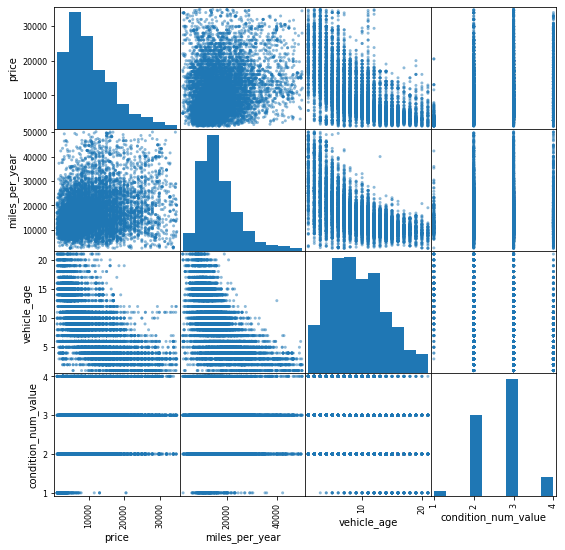

In [93]:
pd.plotting.scatter_matrix(SUV_data[['price','miles_per_year','vehicle_age', 'condition_num_value']], figsize=(9, 9))

The condition chart looks odd. Maybe because the condition is a categorical parameter, rather than numeric. We should plot a boxplot for condition.

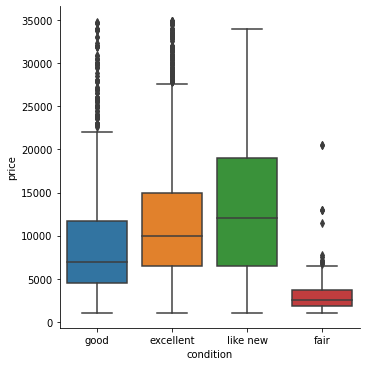

In [94]:
sns.catplot(y='price', x='condition', data=SUV_data, kind='box')

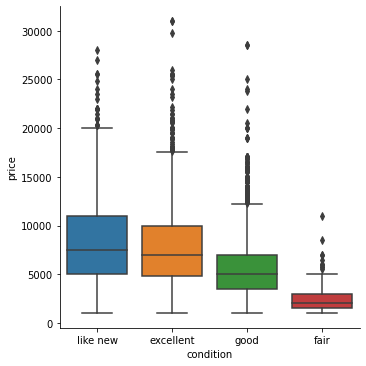

In [95]:
sns.catplot(y='price', x='condition', data=sedan_data, kind='box')

For both types of vehicles, the vehicles in fair condition are cheaper with rather small price range, comparing to vehicles in 'like new', 'excellent', and 'good' conditions.   
In sedan, the 'like new' condition has large price range and the upper limit is further from the median, than for other categories. 

array([[<AxesSubplot:xlabel='price', ylabel='price'>,
        <AxesSubplot:xlabel='miles_per_year', ylabel='price'>,
        <AxesSubplot:xlabel='vehicle_age', ylabel='price'>],
       [<AxesSubplot:xlabel='price', ylabel='miles_per_year'>,
        <AxesSubplot:xlabel='miles_per_year', ylabel='miles_per_year'>,
        <AxesSubplot:xlabel='vehicle_age', ylabel='miles_per_year'>],
       [<AxesSubplot:xlabel='price', ylabel='vehicle_age'>,
        <AxesSubplot:xlabel='miles_per_year', ylabel='vehicle_age'>,
        <AxesSubplot:xlabel='vehicle_age', ylabel='vehicle_age'>]],
      dtype=object)

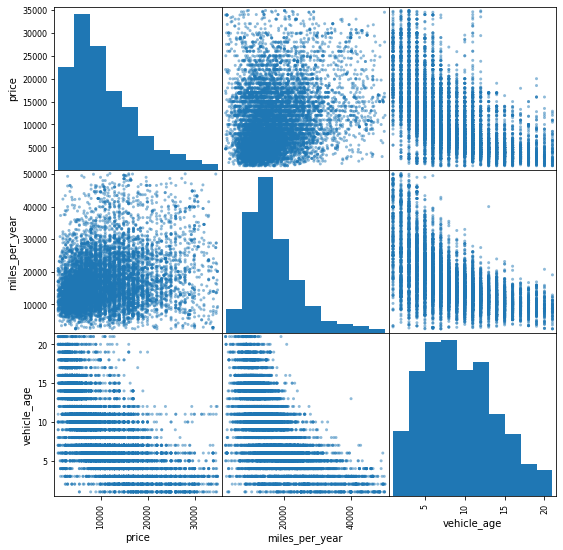

In [96]:
pd.plotting.scatter_matrix(SUV_data[['price','miles_per_year','vehicle_age']], figsize=(9, 9))

array([[<AxesSubplot:xlabel='price', ylabel='price'>,
        <AxesSubplot:xlabel='miles_per_year', ylabel='price'>,
        <AxesSubplot:xlabel='vehicle_age', ylabel='price'>],
       [<AxesSubplot:xlabel='price', ylabel='miles_per_year'>,
        <AxesSubplot:xlabel='miles_per_year', ylabel='miles_per_year'>,
        <AxesSubplot:xlabel='vehicle_age', ylabel='miles_per_year'>],
       [<AxesSubplot:xlabel='price', ylabel='vehicle_age'>,
        <AxesSubplot:xlabel='miles_per_year', ylabel='vehicle_age'>,
        <AxesSubplot:xlabel='vehicle_age', ylabel='vehicle_age'>]],
      dtype=object)

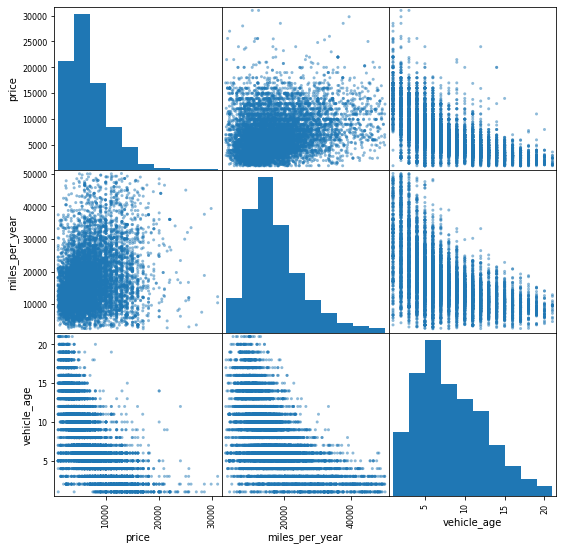

In [97]:
pd.plotting.scatter_matrix(sedan_data[['price','miles_per_year','vehicle_age']], figsize=(9, 9))

In [98]:
SUV_data.corr()

,price,model_year,cylinders,odometer,is_4wd,days_listed,weekday_posted,month_posted,year_posted,vehicle_age,miles_per_year,condition_num_value
price,1.000000,0.634937,0.062391,-0.620290,0.132065,-0.017086,0.007165,-0.016512,0.018253,-0.632249,0.263999,0.267823
model_year,0.634937,1.000000,-0.289856,-0.632092,-0.066881,-0.006247,0.000678,-0.035948,0.038248,-0.994798,0.597938,0.269276
cylinders,0.062391,-0.289856,1.000000,0.271766,0.121817,0.013255,-0.008872,0.014234,-0.018739,0.287568,-0.109353,-0.098628
odometer,-0.620290,-0.632092,0.271766,1.000000,0.011896,0.009350,-0.004764,0.022620,-0.026249,0.628593,0.045127,-0.298646
is_4wd,0.132065,-0.066881,0.121817,0.011896,1.000000,-0.004270,0.013736,0.002665,-0.008766,0.065900,-0.058297,-0.000411
days_listed,-0.017086,-0.006247,0.013255,0.009350,-0.004270,1.000000,-0.008208,-0.001765,-0.003043,0.005928,0.003425,-0.012575
weekday_posted,0.007165,0.000678,-0.008872,-0.004764,0.013736,-0.008208,1.000000,0.023221,-0.019121,-0.002626,-0.014702,0.017230
month_posted,-0.016512,-0.035948,0.014234,0.022620,0.002665,-0.001765,0.023221,1.000000,-0.819069,-0.047596,0.106180,-0.002964
year_posted,0.018253,0.038248,-0.018739,-0.026249,-0.008766,-0.003043,-0.019121,-0.819069,1.000000,0.063743,-0.132450,0.005282
vehicle_age,-0.632249,-0.994798,0.287568,0.628593,0.065900,0.005928,-0.002626,-0.047596,0.063743,1.000000,-0.610661,-0.268387


In [99]:
sedan_data.corr()

,price,model_year,cylinders,odometer,is_4wd,days_listed,weekday_posted,month_posted,year_posted,vehicle_age,miles_per_year,condition_num_value
price,1.000000,0.669047,0.008434,-0.620553,0.131284,0.000701,-0.009797,-0.044996,0.045140,-0.664620,0.271964,0.297375
model_year,0.669047,1.000000,-0.177264,-0.613495,0.027406,-0.000306,0.001870,-0.061653,0.062279,-0.993954,0.572488,0.266667
cylinders,0.008434,-0.177264,1.000000,0.126688,0.123465,-0.005447,-0.007942,0.001590,-0.010261,0.176278,-0.077891,-0.069355
odometer,-0.620553,-0.613495,0.126688,1.000000,-0.001912,-0.001800,-0.004409,0.034553,-0.032625,0.610400,0.099559,-0.297012
is_4wd,0.131284,0.027406,0.123465,-0.001912,1.000000,0.007119,-0.018918,0.010059,-0.008475,-0.028361,0.033888,0.009839
days_listed,0.000701,-0.000306,-0.005447,-0.001800,0.007119,1.000000,0.009733,-0.011160,0.014065,0.001853,0.000851,-0.007447
weekday_posted,-0.009797,0.001870,-0.007942,-0.004409,-0.018918,0.009733,1.000000,0.007266,-0.008807,-0.002840,-0.000586,0.001152
month_posted,-0.044996,-0.061653,0.001590,0.034553,0.010059,-0.011160,0.007266,1.000000,-0.822831,-0.028819,0.089503,-0.011080
year_posted,0.045140,0.062279,-0.010261,-0.032625,-0.008475,0.014065,-0.008807,-0.822831,1.000000,0.047684,-0.110268,0.014600
vehicle_age,-0.664620,-0.993954,0.176278,0.610400,-0.028361,0.001853,-0.002840,-0.028819,0.047684,1.000000,-0.585080,-0.265275


**Conclusions on the correlations of price, mileage, and age**

- Model_year and price have strong positive correlation. The higher the year a model was produced, the higher the price. For sedan the correlation is slightly stronger, than for SUV.   
- Vehicle age and price have strong negative correlation. This is logical, as this is the reversed relations of model_year and price. The older the car, the lower the price. For sedan the correlation is slightly stronger, than for SUV.  
- Odometer and price have strong negative correlation. The more total mileage the car has, the lower the price.      
- It's interesting to note that miles_per_year has a weaker correlation with the price, than the total mileage (odometer). 
- Condition and price have some correlation, but very weak.  
- Number of cylinders has no impact on the price.  

## General conclusion


**1. Missing Values**   

The missing values were found and replaced in the following columns:
- model_year - about 7% of the data – replaced with average year for a model
- cylinders - about 10% of the data – replaced with average per model
- odometer - a little over 15% of the data were replaced with average by model_year and model
- is_4wd - 50% of the data is missing – the data was Boolean type, and therefor, the missing  values were replaced with 0.
In paint_color column the missing values constituted a little over 17% of the data. The data was not restored in this column, as it is impossible to predict a color of a vehicle.   

**2. Column with inappropriate data types:**
- date_posted - the data type was converted to datetime for further analysis.   

**3. Data enrichment**
- The following columns were added to the dataset: day of the week, month, and year, when the ad was posted. The year of the post was crucial to calculate the age of the vehicle.
- The condition values were replaced with numeric values to be manipulated more easily.
83 rows with missing values after the previous treatment were dropped.   

**4. Studying core parameters**   
- Price   
- The vehicle's age when the ad was placed   
- Mileage (total and average per year)   
- Number of cylinders   
- Condition


After examination of the core parameters, some outliers were identified which might have had an impact on the data. Therefore, the following was not included in the analysis: 
-	Price above 34950 and below 1000
-	Vehicles' age above 21 and below 1
-	Average miles per year above 50238.6 and below 2390
-	Cylinders number above 8 and below 4. Additionally, vehicles with 5 cylinders were not included in the calculations, as this does not represent a typical vehicle.
-	Condition values above 4 (like new) and below 1 (fair). Ultimately, new cars and cars in salvage condition were not included in the analysis.   

For the dataframe without outliers we’ve build histograms:   
- The price parameter had a few peaks: at 5,000, at 9,000, 13,000, and 19,000.   
- The vehicles' age parameter had two peaks: at 5 and at 11 years.  
- Miles per year parameter had a peak at about 12,000 miles.   
- There's almost the same number of cylinders of each type, with a slight advantage for 6-cylinder cars.   
- Condition parameter - over 20.000 cars (about 50%) were in excellent condition.  

**5. Ads lifetime**
We’ve built a histogram for days_listed. There's a peak at about 22 days, and from the data it is clear that the typical lifetime of an ad is between 19 and 53 days.
Anything below 19 days seems to be too fast. Anything above 53 days is too long.   

**6. Popular Types**
We The two types with the biggest number of ads were SUV and sedan.
To examine the popular vehicle types, we’ve built histogram and boxplot charts.

   1. The conclusions on general data:
   -	About 50% of the vehicles listed were in excellent condition.
   -	The majority of the vehicles listed were automatic.
   -	The majority of the vehicles listed used gasoline.
   -	No significant different in the number of ads. The 8-cylinder cars seem to be more expensive.
   -	White, black, silver, grey, and blue are top 5 colours. And purple, yellow, and orange are the list popular colours.

   2. The conclusions on the popular vehicles types:   
   
   We took each of the two popular types detected (SUV and sedan) and studied whether the price depends on age, mileage, condition, transmission type, and colour. For categorical variables (transmission type and colour), we plotted box-and-whisker charts, and we’ve created scatterplots for the rest.

In SUV vehicles, the median price for manual transmission and other type of transmission is slightly higher than for the automatic one. However, the price range for the automatic transmission is very big with a significant number of outliers on the upper end.
In sedan vehicles, the median price for automatic transmission and other type of transmission is slightly higher than for the manual one. The price range for the automatic transmission is bigger than for other types of transmission, with a significant number of outliers on the upper end.

For SUV, listings with colours purple, yellow, and orange were not included in the analysis, as there're fews than 50 ads for each colour. For sedan, vehicles with colours yellow and purple were not included in the analysis because of the same reason. For both SUV and sedan vehicles, it's difficult to determine whether a colour plays a factor in vehicle's price. There're many outliers for all colours on the upper side and the price range seems to be very large. In SUV, the rare colour such as orange seems to be most expensive, but the number of listings is too small, relatively to other vehicle colours, to drive any conclusions. In sedan type vehicles we can only conclude that the median price for green and brown vehicles is sligtly lower than for other colours.

We plotted a boxplot for condition, condition seemed to be a categorical parameter, rather than numeric.
For both types of vehicles, vehicles in fair condition are cheaper with rather small price range, compared to vehicles in 'like new', 'excellent', and 'good' conditions.   
In sedan, the 'like new' condition has large price range, and the upper limit is further from the median, than for other categories.

**7. General conclusions**

- Model_year and price have strong positive correlation. The higher the year a model was produced, the higher the price. For sedan the correlation is slightly stronger, than for SUV.   
- Vehicle age and price have strong negative correlation. This is logical, as this is the reversed relations of model_year and price. The older the car, the lower the price. For sedan the correlation is slightly stronger, than for SUV.  
- Odometer and price have strong negative correlation. The more total mileage the car has, the lower the price. 
- It's interesting to note that miles_per_year has a weaker correlation with the price, than the total mileage (odometer).  
- Condition and price have some correlation, but very weak. 
- Number of cylinders has no impact on the price.     
 

**Thus, the hypothesis wasn't completetly confirmed: it seems that only total mileage and age are important factors in car's price.**
